In [38]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import random
from copy import deepcopy
import pandas as pd
sys.path.append('../src')
import lcp
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from train import train_models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# train 3 models

In [39]:
np.random.seed(13)
data = datasets.load_breast_cancer()
data['target_names'] = data['target_names'][::-1] # want class 1 to be "malignant", class 0 to be "benign"
X = data['data']
y = 1 - data['target'] # want class 1 to be "malignant", class 0 to be "benign"
X_train, X_test, y_train, y_test = train_test_split(X, y) # defaults to 0.75: 0.25 splitx`

In [40]:
# class_weights = [0.5, 1, 2]
class_weights = [0.2, 1, 5]
models = train_models(X_train, y_train, class_weights, model_type='logistic')
# models = train_models(X_train, y_train, class_weights, model_type='logistic')

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



# model importances

In [41]:
np.random.seed(13)
x = X_test[0].reshape(1, -1)
class_num = 1
feature_names = data['feature_names']
target_name = data['target_names'][1]
strategy = 'independent' # gaussian_kde

In [42]:
random.shuffle(feature_names)

**get feature importances**

In [43]:
explainer = lcp.Explainer(X_train, feature_names=feature_names, strategy=strategy, target_name=target_name)
explainer.explain_instance(x, models[1].predict_proba, class_num, return_table=True)

,contribution,sensitivity
worst texture,-0.771,0.017
mean texture,-0.68,0.003
mean perimeter,-0.537,0.03
mean symmetry,-0.381,0
worst radius,-0.242,0.031
mean area,0.103,-0.021
mean concave points,-0.082,-0.208
symmetry error,-0.053,-0.212
mean compactness,0.046,-0.071
mean smoothness,-0.024,0.144


**visualize a particular feature locally**

contribution: 0.019, sensitivity pos: -0.003


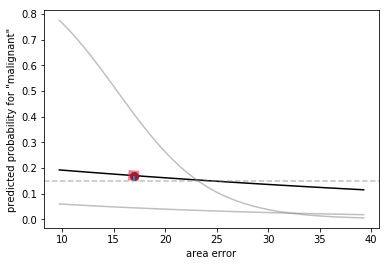

In [59]:
feature_name = 'area error' # area error

fig = plt.figure()
expl_dicts = []
for i in range(3):
    expl_dicts.append(explainer.explain_instance_feature(x, models[i].predict_proba, 
                                                         feature_name=feature_name, class_num=class_num))

print(f'contribution: {expl_dicts[1]["contribution"]:0.3f}, sensitivity pos: {expl_dicts[1]["sensitivity_pos"]:0.3f}')

explainer.viz_expl_feature(expl_dicts[1], [expl_dicts[0], expl_dicts[2]])


**visualize all features interactively**

In [60]:
expl_dicts = []
for i in range(3):
    expl_dicts.append(explainer.explain_instance(x, models[i].predict_proba, class_num, return_table=False))

In [61]:
explainer.viz_expl(expl_dicts[1], [expl_dicts[0], expl_dicts[2]], filename='out_breast_cancer.html')

/accounts/projects/vision/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



ValueError: 
    Invalid value of type 'numpy.int64' received for the 'active' property of layout.updatemenu
        Received value: 13

    The 'active' property is a integer and may be specified as:
      - An int (or float that will be cast to an int)
        in the interval [-1, 9223372036854775807]